# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [3]:
pip install palmerpenguins

In [6]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [13]:
penguins = penguins.dropna()

In [21]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(
    X=penguins[["bill_length_mm"]], #need to use [[]] in the x-axis in order to have a 2D array (n_samples × n_features)
    y=penguins["bill_depth_mm"]
)

lin_model.coef_, lin_model.intercept_

(array([-0.08232675]), np.float64(20.786648668433827))

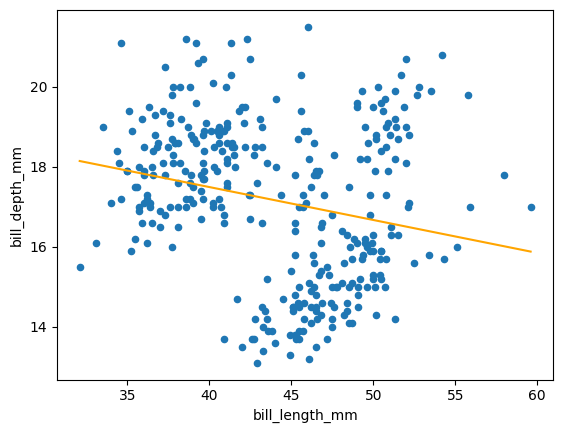

In [28]:
import numpy as np
import pandas as pd

X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(),
        penguins["bill_length_mm"].max(),
        num=1000)
y_new_ = pd.Series(
    model1.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange");

In [25]:
penguins["bill_length_mm_square"] = penguins["bill_length_mm"] ** 2
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_mm_square
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49


In [26]:
quad_model = LinearRegression()
quad_model.fit(
    X=penguins[["bill_length_mm", "bill_length_mm_square"]],
    y=penguins["bill_depth_mm"]
)

quad_model.coef_, quad_model.intercept_

(array([-1.40407712,  0.01498039]), np.float64(49.49494362318971))

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

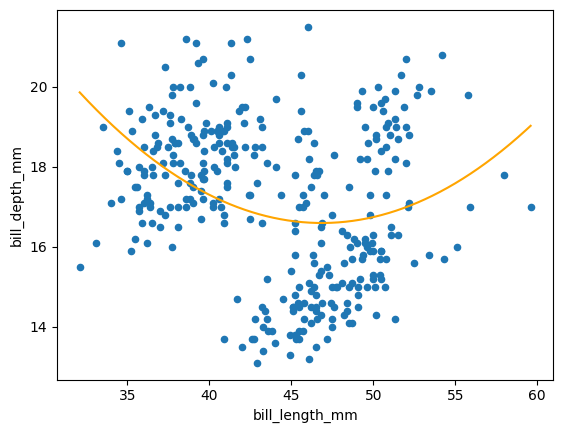

In [30]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(),
        penguins["bill_length_mm"].max(),
        num=1000)
X_new["bill_length_mm_square"] = X_new["bill_length_mm"] ** 2
y_new_ = pd.Series(
    quad_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange")

In [31]:
penguins["bill_length_mm_cube"] = penguins["bill_length_mm"] ** 3
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_mm_square,bill_length_mm_cube
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49,60698.457


In [32]:
cube_model = LinearRegression()
cube_model.fit(
    X=penguins[["bill_length_mm", "bill_length_mm_square", "bill_length_mm_cube"]],
    y=penguins["bill_depth_mm"]
)

cube_model.coef_, cube_model.intercept_

(array([ 6.77963360e+00, -1.68915134e-01,  1.36264370e-03]),
 np.float64(-70.53172659621545))

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

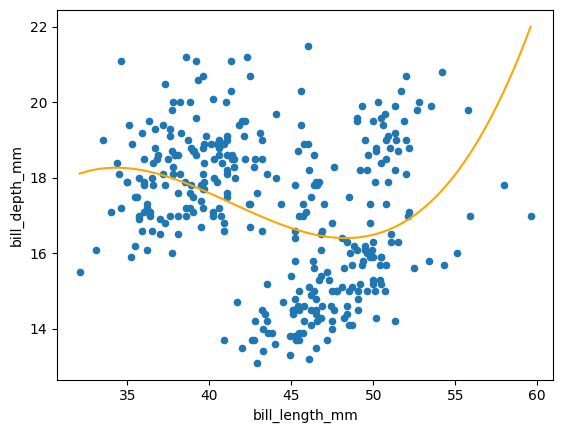

In [34]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(),
        penguins["bill_length_mm"].max(),
        num=1000)
X_new["bill_length_mm_square"] = X_new["bill_length_mm"] ** 2
X_new["bill_length_mm_cube"] = X_new["bill_length_mm"] ** 3
y_new_ = pd.Series(
    cube_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange")

In [35]:
penguins["bill_length_mm_4"] = penguins["bill_length_mm"] ** 4
penguins["bill_length_mm_5"] = penguins["bill_length_mm"] ** 5
penguins["bill_length_mm_6"] = penguins["bill_length_mm"] ** 6
penguins["bill_length_mm_7"] = penguins["bill_length_mm"] ** 7
penguins["bill_length_mm_8"] = penguins["bill_length_mm"] ** 8
penguins["bill_length_mm_9"] = penguins["bill_length_mm"] ** 9
penguins["bill_length_mm_10"] = penguins["bill_length_mm"] ** 10
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_mm_square,bill_length_mm_cube,bill_length_mm_4,bill_length_mm_5,bill_length_mm_6,bill_length_mm_7,bill_length_mm_8,bill_length_mm_9,bill_length_mm_10
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49,60698.457,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15


In [36]:
ten_model = LinearRegression()
ten_model.fit(
    X=penguins[["bill_length_mm", "bill_length_mm_square", "bill_length_mm_cube", "bill_length_mm_4", "bill_length_mm_5",
                "bill_length_mm_6", "bill_length_mm_7", "bill_length_mm_8", "bill_length_mm_9", "bill_length_mm_10"]],
    y=penguins["bill_depth_mm"]
)

ten_model.coef_, ten_model.intercept_

(array([ 9.30261877e-14,  4.30634238e-12,  1.56064756e-10,  4.04003958e-09,
         7.67183179e-08,  8.42985453e-07, -6.03511104e-08,  1.63196189e-09,
        -1.97124749e-11,  8.95411667e-14]),
 np.float64(-21.342766577098118))

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

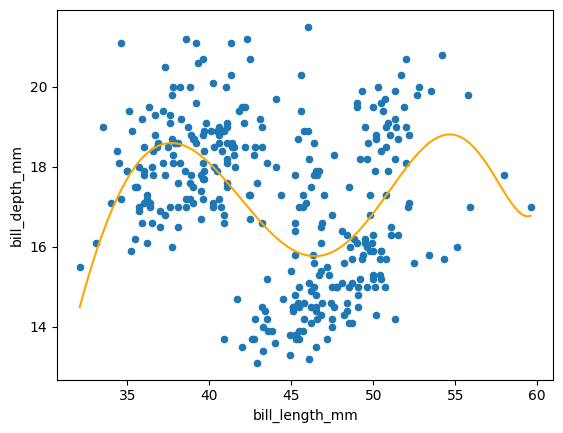

In [37]:
X_new = pd.DataFrame()
X_new["bill_length_mm"] = np.linspace(penguins["bill_length_mm"].min(),
        penguins["bill_length_mm"].max(),
        num=1000)
X_new["bill_length_mm_square"] = X_new["bill_length_mm"] ** 2
X_new["bill_length_mm_cube"] = X_new["bill_length_mm"] ** 3
X_new["bill_length_mm_4"] = X_new["bill_length_mm"] ** 4
X_new["bill_length_mm_5"] = X_new["bill_length_mm"] ** 5
X_new["bill_length_mm_6"] = X_new["bill_length_mm"] ** 6
X_new["bill_length_mm_7"] = X_new["bill_length_mm"] ** 7
X_new["bill_length_mm_8"] = X_new["bill_length_mm"] ** 8
X_new["bill_length_mm_9"] = X_new["bill_length_mm"] ** 9
X_new["bill_length_mm_10"] = X_new["bill_length_mm"] ** 10
y_new_ = pd.Series(
    ten_model.predict(X_new),
    index=X_new["bill_length_mm"]
)

penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
y_new_.plot.line(c = "orange")

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model underfits the data, since the line is too simple to capture the curved pattern in the data. It also ignores the variation between the clusters of points. The cubic and degree 10 model overfits the model, since the lines bend excessively to fit every variation, which means it may be capturing the noise as well. In my opinion, the quadratic model fits the data the best, since it captures the general trend without exactly following the points of this specific dataset.